# 2. Gyakorlat - 1 DoF csillapítatlan rendszer
2021.02.16

## Feladat:
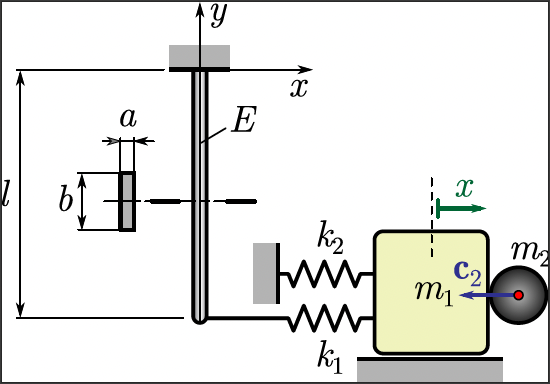


A mellékelt ábrán egy 1 szabadságfokú lengőrendszer látható, mely áll egy $m_1$ tömegből, valamint $k_1$ és $k_2$ rugómerevségű rugókból. Az egyik rugó egy vertikális befogott tartóhoz csatlakozik, melynek hossza $l$, a kereszmetszetét az $a$ és $b$ paraméterrel lehet jellemezni, továbbá anyagának rugalmassági modulusza $E$. A gerenda tömege elhanyagolható. Az $m_1$ tömeg helyzete az $x$ általánosított koordinátával írható le. A rendszert egy ütközés hozza mozgásba (rezgésbe), mely az $m_1$ tömeg és $m_2$ redukált tömeg között jön létre.

### Adatok:
|||
|-----------------|-----------------|
| $a$ = 0,006 m   | $b$ = 0,025 m   |
| $l$ = 0,5 m     | $E$ = 200 GPa   |
| $m_1$ = 5 kg    | $m_2$ = 1 kg    |
| $k_1$ = 100 N/m | $k_2$ = 50 N/m  |
| $c_1$ = 0 m/s   | $c_2$ = 0,6 m/s |
| e = 0,5         |                 |

### Részfeladatok:
1. Határozza meg a rendszer sajátkörfrekvenciáját!
2. Számítsa ki az $m_1$ test ütközés hatására létrejövő rezgésének maximális elmozdulását, sebességét, és gyorsulását. Ábrázolja diagramon az elmozdulás, a sebesség és a gyorsulás időfüggvényét.


## Megoldás:

### 1. Feladat

Redukáljuk a rendszert az alábbi alakúra:

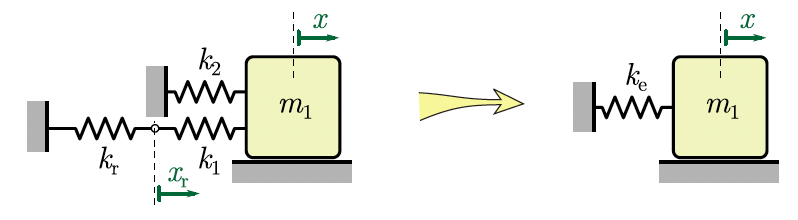

A befogott tartó végpontjának adott erőhatásra történő $f$ elmozdulása az alábbi módon számítható:
$$f = \frac{Fl^3}{3I_{\mathrm{z}}E},$$

melyben $I_{\mathrm{z}}$ a tartó keresztmetszetének $z$ tengelyre vett másodrendű nyomatéka. A gerenda merevsége, mely a helyettesítő rugó merevségét adja meg:
$$k_r = \frac{F}{f}.$$

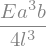

In [1]:
import sympy as sp
import numpy as np
from IPython.display import Math # Hogy tudjunk LaTeX szöveget kiírni

sp.init_printing()  # a szebb kiíratásért

a,b,l,E,m1,m2,k1,k2,c1,c2,e = sp.symbols('a, b, l, E, m1, m2, k1, k2, c1, c2, e')
F = sp.symbols('F')
x,xr = sp.symbols('x, x_r')

# Készítsünk behelyettesítési listát az adatok alapján, SI-ben
adatok = ((a, 0.006), (b, 0.025), (l, 0.5), (E, 2*10**11),
          (m1, 5), (m2, 1), (k1, 100), (k2, 50), (c1, 0),
          (c2, 0.6), (e, 0.5))

Iz = a**3*b/12  # sziltan
f = F*l**3/3/Iz/E
kr = F/f
kr

In [2]:
display(Math('k_r = {}'.format(sp.latex(kr))))

# Ez a sor elsőre lehet kicsit sok. Gyakorlatilag az történik, hogy a 
# `display` függvény az arugmentumába egy `Math` objektumot kap, amit 
# LaTeX stílusban fog kiíratni. Amennyiben a beadott stringhez sze-
# retnénk hozzáfűzni egy változót is, úgy annak helyét `{}`-kel kell
# jelezni. Ezt követően a `.format()` metódussal "cseréljük ki" ezt a
# tényleges változóban tárolt kifejezésre, esetleg értékre. Mivel 
# most egy kifejezést szeretnék kiíratni, nem egy egyszerű értéket,
# így nem csupán a `kr` kerül a `format()` argumentumába, hanem a kifejezés
# LaTeX kódja. Így a `display` függvény ezt is megfelelő módon formázza:

<IPython.core.display.Math object>

In [3]:
# Nézzünk mi történik, ha a pusztán a `kr` kifejezést íratjuk ki

display(Math('k_r = {}'.format(kr))) 
# Eredmény: csúnya, nem LaTeX :(

<IPython.core.display.Math object>

In [4]:
# Megoldás: nézzük `kr` LaTeX kódját:
sp.latex(kr)
# Ha ezt a kódot íratjuk ki, a display függvény beformázza.

'\\frac{E a^{3} b}{4 l^{3}}'

In [5]:
# Numerikusan az eredmény N/m-ben
kr_num = kr.subs(adatok);

display(Math('k_r = {:.1f}'.format(kr_num))) 
# `:.1f` -> floatot íratunk ki, egy tizedes pontossággal

<IPython.core.display.Math object>

Az egyenértékű merevség a potenciális energiák egyenlőségéből meghatározható:
$$ U = \frac{1}{2}k_rx_r^2+\frac{1}{2}k_1(x-x_r)^2+\frac{1}{2}k_2x^2 \leftrightarrow U = \frac{1}{2}k_ex^2,$$

ahol $x_r$ a befogott tartó szabad végének elmozdulása. A soros elrendezés miatt a $k_r$ és $k_1$ rugóállandójú rugókban ébredő erő megegyezik:

$$F_r = F_1 \rightarrow k_rx_r = k_1(x-x_r),$$

ahonnan

$$x_r = \frac{k_1}{k_1+k_r}x.$$

In [6]:
Fr = kr*xr
F1 = k1*(x-xr)

# Megoldjuk az `F1-Fr = 0` egyenletet `xr`-re. Ebben a formában
# már `kr`-nek a kifejtett alakja van behelyettesítve
xr = sp.solve(F1-Fr,xr)[0]  

display(Math('x_r = {}'.format(sp.latex(xr))))

<IPython.core.display.Math object>

In [7]:
U = 0.5*kr * xr**2 + 0.5*k1 * (x-xr)**2 + 0.5*k2 * x**2 

# A potenciális energia kifejezésében az egyenértékű merevség
# az x^2 együtthatójának duplája.

U = U.expand()
# Ez egy nagyon fontos parancs, csak így tudjuk az együtthatókat keresni.
# Így a kifejezésben minden zárójeles tag kifejtésre kerül


ke = 2*U.coeff(x,2)  # (x,2) -> x^2 együtthatóját keressük

display(Math('k_e = {}'.format(sp.latex(ke))))

<IPython.core.display.Math object>

In [8]:
# Numerikusan az eredmény, N/m-ben:
ke_num = ke.subs(adatok).evalf(6)

display(Math('k_e = {}'.format(ke_num)))

<IPython.core.display.Math object>

A rugórendszert így már helyettesíthetjük a kiszámolt eredő rugómerevséggel. Ebben az esetben a vizsgált rendszer mozgásegyenlete a következő alakot ölti:
$$\ddot{x} + \underbrace{\frac{k_e}{m_1}}_{\omega_n^2}x = 0.$$

In [9]:
ω_n = sp.sqrt(ke/m1)
ω_n_num = ω_n.subs(adatok).evalf(5);

# Numerikusan az eredmény rad/s-ban
display(Math('\omega_n = {}'.format(ω_n_num)))

<IPython.core.display.Math object>

### 2. Feladat

A felvázolt differenciálegyenletet kezedeti érték híján nem tudjuk még megoldani. Azt az ütközésből számíthatjuk, mely mindkét test számára centrikus.

A testek sebességeinek normális komponense az ütközés előtt:

In [10]:
c1_n = 0  # SI
c2_n = -0.6  # SI

# A közös súlypont sebessége

cS_n = (m1*c1_n+m2*c2_n)/(m1+m2)
cS_n = cS_n.subs(adatok)
display(Math('c_{{Sn}} = {:.1f}'.format(cS_n)))

# m/s-ban

<IPython.core.display.Math object>

Az ütközés utáni sebességek az alábbi módon számíthatóak:

In [11]:
v1_n = (cS_n + e*(cS_n - c1_n)).subs(adatok)
v2_n = (cS_n + e*(cS_n - c2_n)).subs(adatok)

display(Math('v_{{1n}} = {:.2f}'.format(v1_n)))
display(Math('v_{{2n}} = {:.2f}'.format(v2_n)))

# m/s-ban

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [12]:
t = sp.symbols('t')
x_t = sp.Function('x')(t) # meg kell különbözteteni az eddig használt `x`-től,
                          # mert ez egy függvény.

mozg_egy = x_t.diff(t,2) + ω_n_num**2*x_t
display(Math('{} = 0'.format(sp.latex(mozg_egy))))

# A mozgásegyenlet

<IPython.core.display.Math object>

In [13]:
megold_sym = sp.dsolve(mozg_egy,x_t)
megold_sym 

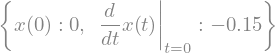

In [14]:
# A kezdtei értékek felvétele:

kezdeti_ert = {x_t.subs(t,0): 0, x_t.diff(t).subs(t,0): v1_n} 
kezdeti_ert

Részletekért lásd: [AMSZ Python gyorstalplaló](https://youtu.be/1KdMsje1I-I?t=3448).

In [15]:
x_t_megold = sp.dsolve(mozg_egy,x_t,ics=kezdeti_ert)
x_t_megold

In [16]:
# Nézzük a sebességet és a gyorsulást (deriváltak)
v_t = x_t_megold.rhs.diff(t) # az egyenlet jobb oldalát (rhs) deriváljuk
a_t = x_t_megold.rhs.diff(t,2)

display(Math('\dot x(t) = {}'.format(sp.latex(v_t))))
display(Math('\ddot x(t) = {}'.format(sp.latex(a_t))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [17]:
# Keressük az elmozdulás maximumát!

szelsoertek_helyek = sp.solve(v_t,t)

szelsoertek_ertekek = [x_t_megold.rhs.subs(t,szelsoertek_helyek[i]) 
                       for i 
                       in range(len(szelsoertek_helyek))]  # list comprehension: lsd. Google, vagy 
                                                           # AMSZ Python gyorstalpaló 30:31

display(szelsoertek_helyek)
display(szelsoertek_ertekek)

In [18]:
x_max = max(szelsoertek_ertekek)
display(Math('x_{{max}} = {:.5f}'.format(x_max)))

# méterben

<IPython.core.display.Math object>

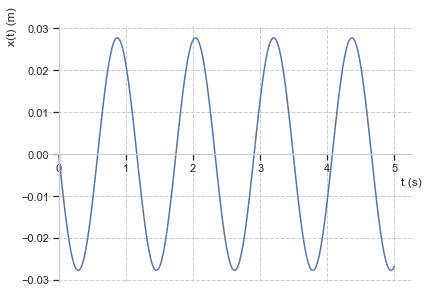

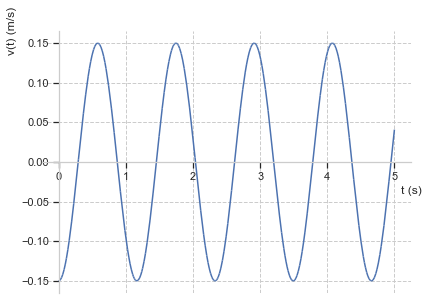

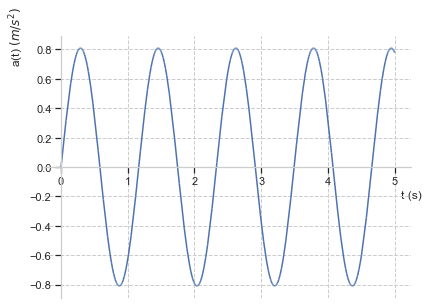

In [19]:
# Ez egy példa volt, hogyan lehet ezt automatizálni sympyban. A többit inkább leolvasás
# alapján. Léteznek egyéb numerikus szélsőérték kereső algoritmusok, de
# most így volt a legegyszerűbb.

# Plottoláshoz rengeteg eszköz áll rendelkezésre (matplotlib, seaborn, plotly ...)
# Most használjuk a sympy sajátját (ami elég hiányos, de egyszerű), 
# kiegészítve a `seaborn` könyvtár funkcióival. Jelen esetben ezt arra 
# használjuk, hogy legyen rácsvonal.

import seaborn as sns
sns.set()
sns.set_style("whitegrid", {'grid.linestyle': '--'})

plot_x = sp.plot(x_t_megold.rhs,
                 (t,0,5), 
                 ylabel='x(t) (m)',
                 xlabel='t (s)',
                 adaptive=False,
                 nb_of_points = 300)  # az eredeti plot kicsit szakaszos volt
plot_v = sp.plot(v_t,
                 (t,0,5),
                 xlabel='t (s)',
                 ylabel='v(t) (m/s)')
plot_a = sp.plot(a_t,
                 (t,0,5),
                 xlabel='t (s)',
                 ylabel='a(t) $(m/s^2)$')

# Ez a parancs majd csak az 1.8-as verziójú sympyban fog működni.
# sp.PlotGrid(3, 1 , plot_x, plot_v, plot_a)

Készítette: 

            Csuzdi Domonkos (Alkalmazott Mechanika Szakosztály) 
            Takács Dénes (BME MM) kidolgozása és ábrái alapján.

            Hibák, javaslatok:
            amsz.bme@gmail.com
            csuzdi02@gmail.com

            2021.02.16
        